### 统计学：检验心理学现象

在下方单元格中回答问题并执行相关代码，你可以 [参考项目指导](https://github.com/udacity/new-dand-advanced-china/blob/master/%E6%A3%80%E9%AA%8C%E5%BF%83%E7%90%86%E5%AD%A6%E7%8E%B0%E8%B1%A1/%E7%BB%9F%E8%AE%A1%E5%AD%A6%EF%BC%9A%E6%A3%80%E9%AA%8C%E5%BF%83%E7%90%86%E5%AD%A6%E7%8E%B0%E8%B1%A1.md) 并在正式提交前查看 [项目要求](https://review.udacity.com/#!/rubrics/305/view)。提交时请将 Jupyter notebook 导出成 HTML 或者 PDF 进行提交（File -> Download As）。

背景信息

在一个Stroop （斯特鲁普）任务中，参与者得到了一列文字，每个文字都用一种油墨颜色展示。参与者的任务是将文字的打印颜色大声说出来。这项任务有两个条件：一致文字条件，和不一致文字条件。在一致文字条件中，显示的文字是与它们的打印颜色匹配的颜色词，如“红色”、“蓝色”。在不一致文字条件中，显示的文字是与它们的打印颜色不匹配的颜色词，如“紫色”、“橙色”。在每个情况中，我们将计量说出同等大小的列表中的墨色名称的时间。每位参与者必须全部完成并记录每种条件下使用的时间。

调查问题

作为一般说明，请确保记录你在创建项目时使用或参考的任何资源。作为项目提交的一部分，你将需要报告信息来源。

(1) 我们的自变量是什么？因变量是什么？

**自变量**：文字条件

**因变量**：说出同等大小的列表中的墨色名称的时间。

(2) 此任务的适当假设集是什么？你需要以文字和数学符号方式对假设集中的零假设和对立假设加以说明，并对数学符号进行定义。你想执行什么类型的统计检验？为你的选择提供正当理由（比如，为何该实验满足你所选统计检验的前置条件）。

**斯特鲁普效应(Stroop effect)在心理学中指优势反应对非优势反应的干扰。例如当测试者被要求回答有颜色意义的字体的颜色时，回答字本身的意义为优势反应，而回答字体颜色为非优势反应，若字体颜色与自意不同，被测者往往会反应速度下降，出错率上升。**

$$H_0: MeanTime_{一致文字条件} - MeanTime_{不一致文字条件} = 0 $$

$$H_1: MeanTime_{一致文字条件} - MeanTime_{不一致文字条件} ＜ 0 $$

$MeanTime_{一致文字条件}$：代表在一致文字条件下，总体反应时间均值。

$MeanTime_{不一致文字条件}$：代表在不一致文字条件下，总体反应时间均值。

**零假设**：代表了在“一致文字条件”下的总体反应时间均值与在“不一致文字条件下”的总体反应时间均值**相等**。

**对立假设**：代表了在“一致文字条件”下的总体反应时间均值**小于**在“不一致文字条件下”的总体反应时间均值。

**本次假设检验的目的在于拒绝零假设。**

**执行什么类型的统计检验**：双总体配对t检验

**理由**：

1)配对：该测试是对同一群测试者抽取每个测试者在“一致文字条件”和“不一致文字条件”下对墨色名称的反应时间样本。因为这两个样本来自同一群人，所以它们是相关样本。相关样本是对一组项目进行的配对测量。

2)我们的样本量比较小，n=24。

3)样本有两个，t检验是用t分布理论来推论差异发生的概率，从而比较两个平均数的差异是否显著

4)双总体t检验是检验两个样本平均数与其各自所代表的总体的差异是否显著。

现在轮到你自行尝试 Stroop 任务了。前往此链接，其中包含一个基于 Java 的小程序，专门用于执行 Stroop 任务。记录你收到的任务时间（你无需将时间提交到网站）。现在下载此数据集，其中包含一些任务参与者的结果。数据集的每行包含一名参与者的表现，第一个数字代表他们的一致任务结果，第二个数字代表不一致任务结果。

(3) 报告关于此数据集的一些描述性统计。包含至少一个集中趋势测量和至少一个变异测量。

In [3]:
# 在这里执行你的分析
import pandas as pd
df=pd.read_csv("stroopdata.csv")
df.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


In [4]:
df.shape

(24, 2)

In [5]:
print("在“一致文字条件”下的平均反应时间:",df.describe()["Congruent"].loc["mean"])
print("在“一致文字条件”下的标准差",df.describe()["Congruent"].loc["std"])

print("-"*50)

print("在“不一致文字条件下”的平均反应时间:",df.describe()["Incongruent"].loc["mean"])
print("在“不一致文字条件下”下的标准差:",df.describe()["Incongruent"].loc["std"])

在“一致文字条件”下的平均反应时间: 14.051125000000004
在“一致文字条件”下的标准差 3.559357957645195
--------------------------------------------------
在“不一致文字条件下”的平均反应时间: 22.01591666666667
在“不一致文字条件下”下的标准差: 4.797057122469138


(4) 提供显示样本数据分布的一个或两个可视化。用一两句话说明你从图中观察到的结果。

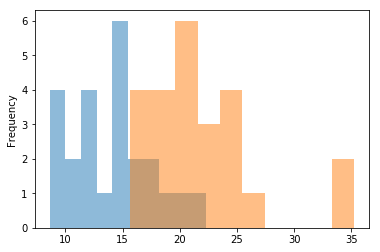

In [6]:
%matplotlib inline
# 在这里创建可视化图表
df["Congruent"].plot(kind="hist",alpha=0.5);
df["Incongruent"].plot(kind="hist",alpha=0.5);

## 根据上图，在“一致文字条件”下的平均反应时间分布在8.630000 ~ 22.328000，在“不一致文字条件下”的平均反应时间分布在15.687000 ~ 35.255000。

(5) 现在，执行统计测试并报告你的结果。你的置信水平和关键统计值是多少？你是否成功拒绝零假设？对试验任务得出一个结论。结果是否与你的期望一致？

In [7]:
# 在这里执行统计检验 
import scipy.stats as stats
stats.ttest_rel(df["Congruent"],df["Incongruent"])

Ttest_relResult(statistic=-8.020706944109957, pvalue=4.103000585711178e-08)

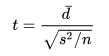

In [24]:
import numpy as np

#1. Calculate the difference (di = yi − xi)  and  Calculate the standard deviation of the differences
std=(df["Incongruent"]-df["Congruent"]).std()

# 2. Calculate the mean difference, ¯d.
mean_diff=df["Congruent"].mean()-df["Incongruent"].mean()

# 3.calculate the standard error of the mean difference
n=df.shape[0]
std_e=std/np.sqrt(n)

# 4.Calculate the t-statistic
t_statistic=mean_diff/(std_e)

# 5.Use tables of the t-distribution to compare your value for T to the tn−1 distribution.
t_critical=1.714

print("Confidence intervals:95%")
print("α level(for one side):5%")
print("Degrees of freedoom:",23)
print("T statistics:",t_statistic)
print("T critical(As per T-table):",t_critical)
print("One tail P value is much less than 0.00005,therefore P value < α")
print("In this case,the difference is considered to be extremely statistically significant,we will reject null hypothesis.")

Confidence intervals:95%
α level(for one side):5%
Degrees of freedoom: 23
T statistics: -8.020706944109955
T critical(As per T-table): 1.714
One tail P value is much less than 0.00005,therefore P value < α


## 结论：在这个案例中，我们的期望是和「斯特鲁普效应」中得出的部分结果一致 - “若字体颜色与自意不同，被测者往往会反应速度下降”。
## 根据我们得出的结果，"Congruent"下，总体反应时间均值和"Incongruent"下，总体反应时间均值的差异被认为是极其显著的，因此我们拒绝零假设，接受备择假设 - 也就是“在"一致文字条件"下的总体反应时间均值小于在"不一致文字条件下"的总体反应时间均值。”，这与我们的期望一致。